## Import All Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Sklearn
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
#from lightgbm import LGBMClassifier
#from catboost import CatBoostClassifier

In [2]:
#!pip install contractions

In [3]:
#!pip install unidecode

In [4]:
# import nltk
# nltk.download("all")

In [5]:
#!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

In [7]:
### NLP 
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from string import punctuation
from unidecode import unidecode
from contractions import fix
from nltk.stem import LancasterStemmer, WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from nltk.util import ngrams
#from gensim.

### Tensorflow
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential,Model
from keras.layers import Input, Dense,Bidirectional, LSTM, SimpleRNN,Embedding
from keras.preprocessing.text import Tokenizer,text_to_word_sequence
#from keras.preprocessing.sequence import pad_sequences


## Load Data

In [73]:
df1 = pd.read_csv("train.csv")
df1

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [74]:
df2 = pd.read_csv("test.csv")
df2

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [8]:
df = pd.read_csv("tweets.csv")
df

,id,keyword,location,text,target
0,0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1
4,4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pard...",0
...,...,...,...,...,...
11365,11365,wrecked,Blue State in a red sea,Media should have warned us well in advance. T...,0
11366,11366,wrecked,arohaonces,i feel directly attacked 💀 i consider moonbin ...,0
11367,11367,wrecked,🇵🇭,i feel directly attacked 💀 i consider moonbin ...,0
11368,11368,wrecked,auroraborealis,"ok who remember ""outcast"" nd the ""dora"" au?? T...",0


In [66]:
df.tail()

,text,target
11365,Media should have warned us well in advance. T...,0
11366,i feel directly attacked 💀 i consider moonbin ...,0
11367,i feel directly attacked 💀 i consider moonbin ...,0
11368,"ok who remember ""outcast"" nd the ""dora"" au?? T...",0
11369,Jake Corway wrecked while running 14th at IRP.,1


In [79]:
df = pd.concat([df,df1],axis=0,ignore_index=True)
df = df[['text','target']]
df

,text,target
0,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,Telangana: Section 144 has been imposed in Bha...,1
2,Arsonist sets cars ablaze at dealership https:...,1
3,Arsonist sets cars ablaze at dealership https:...,1
4,"""Lord Jesus, your love brings freedom and pard...",0
...,...,...
34204,Two giant cranes holding a bridge collapse int...,1
34205,@aria_ahrary @TheTawniest The out of control w...,1
34206,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
34207,Police investigating after an e-bike collided ...,1


In [80]:
df['target'].value_counts()

0    22282
1    11927
Name: target, dtype: int64

In [67]:
df['text'][11365]

'Media should have warned us well in advance. This wrecked my whole night. I refuse to watch…'

In [70]:
a = df['text'][1]
a

'Telangana: Section 144 has been imposed in Bhainsa from January 13 to 15, after clash erupted between two groups on January 12. Po…'

In [81]:
df.columns

Index(['text', 'target'], dtype='object')

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34209 entries, 0 to 34208
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    34209 non-null  object
 1   target  34209 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 534.6+ KB


In [11]:
df['keyword'].nunique()

219

In [12]:
df['text'][0]

'Communal violence in Bhainsa, Telangana. "Stones were pelted on Muslims\' houses and some houses and vehicles were set ablaze…'

In [83]:
# # We will work on text data

# df = df[['text','target']]
df

,text,target
0,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,Telangana: Section 144 has been imposed in Bha...,1
2,Arsonist sets cars ablaze at dealership https:...,1
3,Arsonist sets cars ablaze at dealership https:...,1
4,"""Lord Jesus, your love brings freedom and pard...",0
...,...,...
34204,Two giant cranes holding a bridge collapse int...,1
34205,@aria_ahrary @TheTawniest The out of control w...,1
34206,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
34207,Police investigating after an e-bike collided ...,1


## Target Feature

In [14]:
df['target'].value_counts()

0    9256
1    2114
Name: target, dtype: int64

In [15]:
df['target'].value_counts()

0    9256
1    2114
Name: target, dtype: int64

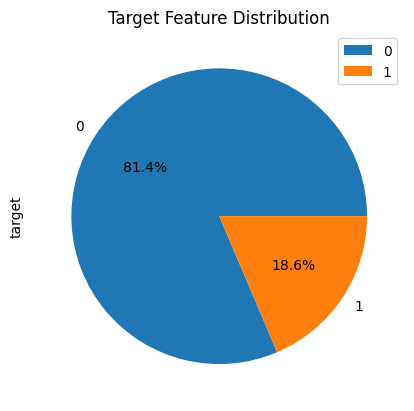

In [16]:
df['target'].value_counts().plot(kind='pie',autopct="%.1f%%")
plt.title("Target Feature Distribution")
plt.legend()
plt.show()

# 1 = Real Disaster
# 0 = Not Real Disaster

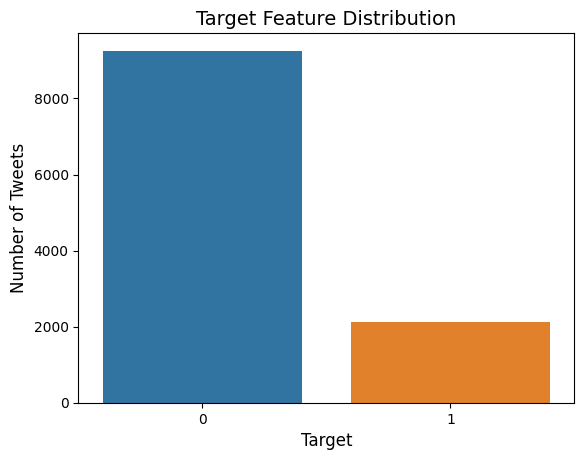

In [17]:
sns.countplot(x=df['target'])
plt.title("Target Feature Distribution", fontsize=14)
plt.xlabel("Target", fontsize=12)
plt.ylabel("Number of Tweets",fontsize=12)
plt.show()

In [18]:
df.head()

,text,target
0,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,Telangana: Section 144 has been imposed in Bha...,1
2,Arsonist sets cars ablaze at dealership https:...,1
3,Arsonist sets cars ablaze at dealership https:...,1
4,"""Lord Jesus, your love brings freedom and pard...",0


## Data Preprocessing

In [84]:
def remove_blank(text):
    data = text.replace("\\n","").replace("\t","")
    return data

def expand_text(text):
    data = fix(text)
    return data

stopwords_list = stopwords.words('english')
stopwords_list.remove("nor")
stopwords_list.remove("not")
stopwords_list.remove("no")

def handling_accented_chr(text):
    data = unidecode(text)
    return data

def clean_text(text):
    tokens = word_tokenize(text)
    data = [i.lower() for i in tokens]
    data = [i for i in data if i not in punctuation]
    data = [i for i in data if i not in stopwords_list]
    data = [i for i in data if i.isalpha()]
    data = [i for i in data if len(i)>2]
    return data 


def lemmatization(text_list):
    lemma = WordNetLemmatizer()
    final_text = []
    for i in text_list:
        a = lemma.lemmatize(i)
        final_text.append(a)
    return " ".join(final_text)

## Split The Data

In [86]:
x_train,x_test,y_train,y_test = train_test_split(df['text'],df['target'], test_size=0.05,
                                                 shuffle=True)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(32498,)
(1711,)
(32498,)
(1711,)


In [87]:
x_train

30402    Former Township fire truck being used in Phili...
29368    What would your city look like if it had been ...
10056    The movie should’ve just been called “The (ins...
23247    Must Read Forecast! Longest Streak of Triple-D...
5585     i think i was a pyromaniac in a previous life ...
                               ...                        
27009    #NOWPLAYING Arsonist MC -  So Impressed -  @AR...
17208    @okgabby_ damn suh. don't let that ruin your y...
5734                                a flattened gummy bear
16048                   @kemal_atlay caught in a landslide
32846    #NowPlaying Last Smoke Before The Snowstorm by...
Name: text, Length: 32498, dtype: object

In [88]:
clean_train = x_train.apply(remove_blank)
clean_test = x_test.apply(remove_blank)

clean_train = clean_train.apply(expand_text)
clean_test = clean_test.apply(expand_text)

clean_train = clean_train.apply(handling_accented_chr)
clean_test = clean_test.apply(handling_accented_chr)

clean_train = clean_train.apply(clean_text)
clean_test = clean_test.apply(clean_text)

clean_train = clean_train.apply(lemmatization)
clean_test = clean_test.apply(lemmatization)

In [89]:
clean_train

30402    former township fire truck used philippine lan...
29368    would city look like subject hiroshima bombing...
10056    movie called insert serial terrorist origin story
23247    must read forecast longest streak heat since h...
5585              think pyromaniac previous life love fire
                               ...                        
27009     nowplaying arsonist impressed arsonistmusic http
17208    damn suh not let ruin year bruh year better st...
5734                                  flattened gummy bear
16048                                     caught landslide
32846    nowplaying last smoke snowstorm benjamin franc...
Name: text, Length: 32498, dtype: object

In [90]:
clean_test

16946              way move like full rainstorm house card
18806          charlesdagnall getting think salt wound rub
6526     davindersingh arrest caught redhanded terroris...
12642    sure burned calorie eating giant bowl mac chee...
21215    crap content marketing deluge dougkessler http...
                               ...                        
28342          santa spring studebaker south trfc inj http
24277    family sue legionnaire family affected fatal o...
5623     fire truck safety department one responder fir...
23899                          guess ill never able mayhem
21617    crackdown destruction restricted multiplayer c...
Name: text, Length: 1711, dtype: object

## TFIDF

In [93]:
tfidf = TfidfVectorizer(max_df=0.95, min_df=2, max_features=10000)
tfidf_train = tfidf.fit_transform(clean_train)
tfidf_test = tfidf.transform(clean_test)

In [94]:
tfidf_train.A.shape

(32498, 10000)

In [95]:
y_test

16946    0
18806    0
6526     1
12642    0
21215    0
        ..
28342    0
24277    1
5623     0
23899    0
21617    0
Name: target, Length: 1711, dtype: int64

## Logistic Regression

In [96]:
lg_model = LogisticRegression()
lg_model.fit(tfidf_train.A, y_train)

C:\Users\SUNIL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [101]:
y_pred = lg_model.predict(tfidf_test.A)
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [102]:
y_pred[:10]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [103]:
y_test.values[:10]

array([0, 0, 1, 0, 0, 1, 0, 1, 0, 1], dtype=int64)

In [104]:
print("---------Model Evaluation on Test Data------------")
print()
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print()
print("-------------------------------------------------")
print("Classification Report:\n",classification_report(y_test,y_pred))
print("------------------------------------------------")
print("Accuracy on Test Data:",accuracy_score(y_test,y_pred))

---------Model Evaluation on Test Data------------

Confusion Matrix:
 [[1051   74]
 [ 183  403]]

-------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.93      0.89      1125
           1       0.84      0.69      0.76       586

    accuracy                           0.85      1711
   macro avg       0.85      0.81      0.82      1711
weighted avg       0.85      0.85      0.85      1711

------------------------------------------------
Accuracy on Test Data: 0.8497954412624197


## SVC

In [ ]:
sv_model = SVC()  # kernel : {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'}
sv_model.fit(tfidf_train.A, y_train)

In [ ]:
y_pred = sv_model.predict(tfidf_test.A)
y_pred

In [ ]:
y_test.values[:10]

In [ ]:
y_pred[:10]

In [ ]:
print("---------Model Evaluation on Test Data------------")
print()
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print()
print("-------------------------------------------------")
print("Classification Report:\n",classification_report(y_test,y_pred))
print("------------------------------------------------")
print("Accuracy on Test Data:",accuracy_score(y_test,y_pred))

## Hyperparameter Tunning for SVC

In [61]:
sv_model1 = SVC()

param_grid = {"C":[0.1, 1, 10, 50],
             'kernel':['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
             'degree': [2, 3, 4],
              'tol': [1e-4, 1e-3, 1e-2]
             }

rscv_model = RandomizedSearchCV(sv_model1, param_grid, cv=3)
rscv_model.fit(tfidf_train.A, y_train)
rscv_model.best_estimator_

KeyboardInterrupt: 

In [ ]:
new_sv_model = rscv_model.best_estimator_

In [ ]:
y_pred = new_sv_model.predict(tfidf_test.A)

In [ ]:
y_test.values[:10]

In [ ]:
y_pred[:10]

In [ ]:
print("---------Model Evaluation on Test Data------------")
print()
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print()
print("-------------------------------------------------")
print("Classification Report:\n",classification_report(y_test,y_pred))
print("------------------------------------------------")
print("Accuracy on Test Data:",accuracy_score(y_test,y_pred))

In [58]:
import pickle
import json

with open("TFIDF_SVC_Model.pickle","wb") as file:
    pickle.dump(sv_model, file)

In [62]:
tfidf

TfidfVectorizer(max_df=0.95, max_features=5000, min_df=2)

In [63]:
with open("TFIDF_VECTOR.pickle",'wb') as file:
    pickle.dump(tfidf, file)